# Implementation Questions
**Question 1**

In [ ]:
import math
import random
import numpy as np
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
dataframe = pd.read_csv("/content/sample_data/Health Insurance Dataset.csv")

In [ ]:
dataframe['bmi'] = dataframe['bmi'].str.replace('٫', '.')
dataframe['charges'] = dataframe['charges'].str.replace('٫', '.')

In [ ]:
dataframe_num = dataframe
replacement_map = {'male': 1, 'female': 0}
dataframe_num['sex'] = dataframe_num['sex'].replace(replacement_map)
replacement_map = {'no': 0, 'yes': 1}
dataframe_num['smoker'] = dataframe_num['smoker'].replace(replacement_map)
replacement_map = {'southwest': 0, 'northwest': 1, 'northeast':2 , 'southeast':3}
dataframe_num['region'] = dataframe_num['region'].replace(replacement_map)
dataframe_num['charges'] = pd.to_numeric(dataframe_num['charges'], errors='coerce', downcast='float')
dataframe_num['bmi'] = pd.to_numeric(dataframe_num['bmi'], errors='coerce', downcast='float')
correlation_matrix = dataframe_num.corr()
print(correlation_matrix)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019 -0.012027  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.014144  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.162590  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673 -0.035115  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.069008  0.787251
region   -0.012027  0.014144  0.162590 -0.035115  0.069008  1.000000  0.077042
charges   0.299008  0.057292  0.198341  0.067998  0.787251  0.077042  1.000000


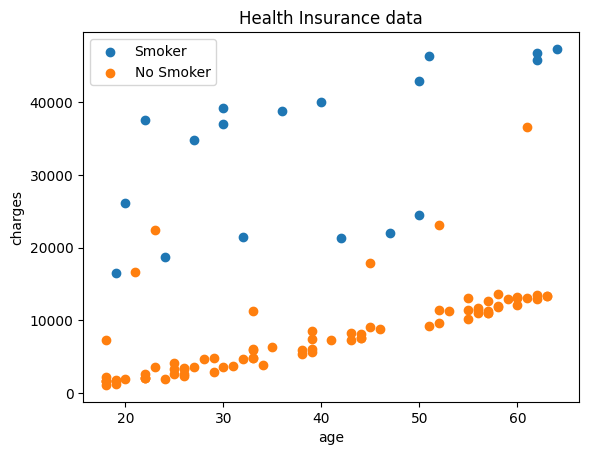

In [ ]:
df = dataframe_num.sample(100)

df_smoker = df[df['smoker'] == 1]
df_nosmoker = df[df['smoker'] == 0]

plt.scatter(df_smoker['age'], df_smoker['charges'], label="Smoker")
plt.scatter(df_nosmoker['age'], df_nosmoker['charges'], label="No Smoker")

#max_index = np.argmax(df['charges'].values)
#min_index = np.argmin(df['charges'].values)

#sample_indices = random.sample(df.index.tolist(), 4)

#plt.xticks(sample_indices)
#plt.yticks(sample_indices)
plt.legend()
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Health Insurance data");

In [ ]:
dataframe_x = dataframe_num[dataframe_num.columns.difference(['charges'])]
X_train, X_test, y_train, y_test = train_test_split(dataframe_x, dataframe_num['charges'], test_size=0.3)

In [ ]:
model =  LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[  255.28800573   310.86116708   645.70212602    77.35149194
  -703.17409953 24177.29454321]
-11860.534924879425


In [ ]:
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print("The mean square error on training data: ",mse)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("The mean square error on testing data: ",mse)

The mean square error on training data:  36165770.26266331
The mean square error on testing data:  38451095.656980924
